In [6]:
import pandas as pd

df = pd.read_csv("dataset-tiktok/hasil_sentimen_indobert_brimo.csv")

df.head()

,Unnamed: 0,date,developerResponse,review,rating,isEdited,title,sentiment_label,confidence
0,0,1/31/2023 15:37,NaN,baguss cuma please transfer ke bank lain janga...,5,False,bagus,Negatif,0.999595
1,1,1/31/2023 17:13,"{'id': 34631786, 'body': 'Hai Sobat BRI, jika ...","Notifikasi brimo saya matikan, krna pemilihan ...",2,False,Bijak dalam kirim push notif,Negatif,0.999032
2,2,1/31/2023 13:43,NaN,"Top,, Lebih mudah transaksi menggunakan BRIMO...",5,False,TRANSAKSI MUDAH DAN AMAN BRIMO,Positif,0.999893
3,3,1/31/2023 11:38,NaN,Memudahkan hidupku,5,False,bagus,Positif,0.999843
4,4,1/31/2023 11:26,NaN,Mantap keren membantu,5,False,Aplikasi nya mantap sekali,Positif,0.999876


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         466 non-null    int64  
 1   date               466 non-null    object 
 2   developerResponse  112 non-null    object 
 3   review             466 non-null    object 
 4   rating             466 non-null    int64  
 5   isEdited           466 non-null    bool   
 6   title              466 non-null    object 
 7   sentiment_label    466 non-null    object 
 8   confidence         466 non-null    float64
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 29.7+ KB


In [8]:
df.columns

Index(['Unnamed: 0', 'date', 'developerResponse', 'review', 'rating',
       'isEdited', 'title', 'sentiment_label', 'confidence'],
      dtype='object')

In [9]:
df["sentiment_label"].value_counts()

sentiment_label
Positif    264
Negatif    202
Name: count, dtype: int64

# Sentimen Positif Bertopic Tiktok

In [ ]:
df_positif = df[df["sentiment_label"] == "Positif"]
texts = df_positif["review"].astype(str).tolist()

In [13]:
df_positif = df[df["sentiment_label"] == "Positif"]
len(df_positif)

264

In [ ]:
texts = (
    df_positif["review"]   
    .dropna()
    .astype(str)
    .str.strip()
    .tolist()
)

# buang yang kosong banget
texts = [t for t in texts if len(t) > 0]

In [15]:
print(type(texts), len(texts))
print(type(texts[0]))
print(texts[223][:200])

<class 'list'> 264
<class 'str'>
Baik sekali pelayanannya


In [16]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(
    "paraphrase-multilingual-mpnet-base-v2"
)

W0109 02:13:12.685000 8716 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.
c:\Users\bayuw\.conda\envs\sentimen\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [17]:
from bertopic import BERTopic

# 5) BERTopic
topic_model = BERTopic(
    embedding_model=embedding_model,
    language="indonesian",
    min_topic_size=40
)

topics, probs = topic_model.fit_transform(texts)

In [18]:
df_positif = df_positif.iloc[:len(topics)].copy()
df_positif["topic"] = topics

In [19]:
topic_counts = (
    df_positif["topic"]
    .value_counts()
    .reset_index()
)

topic_counts.columns = ["topic_id", "jumlah_data"]
topic_counts

,topic_id,jumlah_data
0,0,189
1,1,75


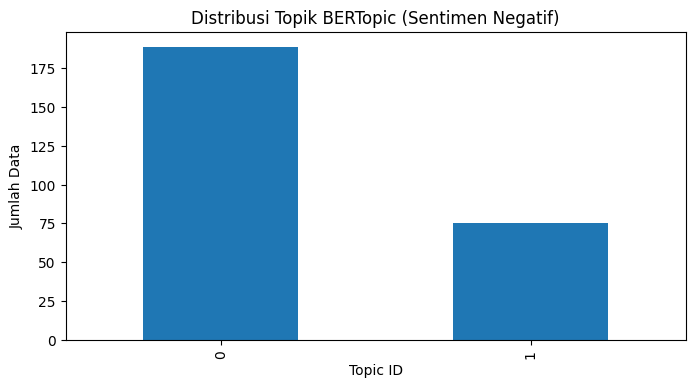

In [20]:
import matplotlib.pyplot as plt

topic_counts.plot(
    x="topic_id",
    y="jumlah_data",
    kind="bar",
    figsize=(8,4),
    legend=False
)
plt.title("Distribusi Topik BERTopic (Sentimen Negatif)")
plt.xlabel("Topic ID")
plt.ylabel("Jumlah Data")
plt.show()

In [21]:
topic_model.get_topic(0)

[('dan', np.float64(0.1056044634090182)),
 ('sangat', np.float64(0.1039620710753883)),
 ('mudah', np.float64(0.08725056381176921)),
 ('transaksi', np.float64(0.08261449540587462)),
 ('membantu', np.float64(0.075540793828224)),
 ('brimo', np.float64(0.06625796340373624)),
 ('cepat', np.float64(0.06490911338612072)),
 ('bagus', np.float64(0.053262846902552397)),
 ('dalam', np.float64(0.048249940213554804)),
 ('bisa', np.float64(0.04739939038188805))]

In [41]:
df_positif.to_csv("output/hasil_bertopic_positif_brimo.csv", index=False)

topic_info = topic_model.get_topic_info()
topic_info.to_csv("output/topic_info_positif_brimo.csv", index=False)

# Sentimen Negatif Bertopic Tiktok

In [24]:
df_negatif = df[df["sentiment_label"] == "Negatif"]
texts = df_negatif["review"].astype(str).tolist()

In [25]:
df_negatif = df[df["sentiment_label"] == "Negatif"]
len(df_negatif)

202

In [26]:
texts = (
    df_negatif["review"]   
    .dropna()
    .astype(str)
    .str.strip()
    .tolist()
)

# buang yang kosong banget
texts = [t for t in texts if len(t) > 0]

In [32]:
print(type(texts), len(texts))
print(type(texts[0]))
print(texts[6][:200])

<class 'list'> 202
<class 'str'>
Kenapa sekarang susah bngt log in tiap mau log in gagal terus padahal internet lancar, ga bisa digunain pas lagi dibutuhin


In [33]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(
    "paraphrase-multilingual-mpnet-base-v2"
)

In [34]:
from bertopic import BERTopic

# 5) BERTopic
topic_model = BERTopic(
    embedding_model=embedding_model,
    language="indonesian",
    min_topic_size=40
)

topics, probs = topic_model.fit_transform(texts)

In [35]:
df_negatif = df_negatif.iloc[:len(topics)].copy()
df_negatif["topic"] = topics

In [36]:
topic_counts = (
    df_negatif["topic"]
    .value_counts()
    .reset_index()
)

topic_counts.columns = ["topic_id", "jumlah_data"]
topic_counts

,topic_id,jumlah_data
0,0,148
1,1,54


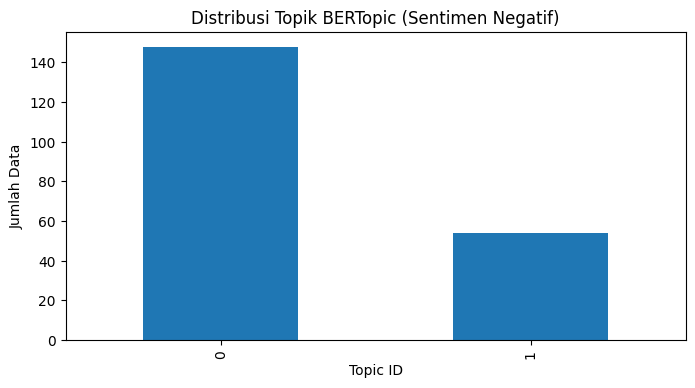

In [37]:
import matplotlib.pyplot as plt

topic_counts.plot(
    x="topic_id",
    y="jumlah_data",
    kind="bar",
    figsize=(8,4),
    legend=False
)
plt.title("Distribusi Topik BERTopic (Sentimen Negatif)")
plt.xlabel("Topic ID")
plt.ylabel("Jumlah Data")
plt.show()

In [38]:
topic_model.get_topic(0)

[('bisa', np.float64(0.07615392140253159)),
 ('di', np.float64(0.061064344301224135)),
 ('tidak', np.float64(0.05591554739362818)),
 ('aplikasi', np.float64(0.05019737021260749)),
 ('saya', np.float64(0.04891905742499283)),
 ('gagal', np.float64(0.04762468964246183)),
 ('brimo', np.float64(0.04088835681964215)),
 ('sudah', np.float64(0.03948263639675973)),
 ('kenapa', np.float64(0.03948263639675973)),
 ('ga', np.float64(0.038055237708111235))]

In [42]:
df_negatif.to_csv("output/hasil_bertopic_negatif_brimo.csv", index=False)

topic_info = topic_model.get_topic_info()
topic_info.to_csv("output/topic_info_negatif_brimo.csv", index=False)